In [55]:
#Libraries

!pip install pandas
!pip install matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
from sklearn.linear_model import LogisticRegression

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

Problem Statement:
Dataset have height of Male/Female of Different countries so finding out which country has Tallest and Shortest Male & Female. 

In [56]:
df=pd.read_csv("C:/Users/Akshay Yadav/Downloads/archive/Height of Male and Female by Country 2022.csv")

In [57]:
df.head(5)
df.tail(5)

,Rank,Country Name,Male Height in Cm,Female Height in Cm,Male Height in Ft,Female Height in Ft
0,1,Netherlands,183.78,170.36,6.03,5.59
1,2,Montenegro,183.30,169.96,6.01,5.58
2,3,Estonia,182.79,168.66,6.00,5.53
3,4,Bosnia and Herzegovina,182.47,167.47,5.99,5.49
4,5,Iceland,182.10,168.91,5.97,5.54


,Rank,Country Name,Male Height in Cm,Female Height in Cm,Male Height in Ft,Female Height in Ft
194,195,Mozambique,164.30,155.42,5.39,5.10
195,196,Papua New Guinea,163.10,156.89,5.35,5.15
196,197,Solomon Islands,163.07,156.79,5.35,5.14
197,198,Laos,162.78,153.10,5.34,5.02
198,199,Timor-Leste,160.13,152.71,5.25,5.01


In [8]:
df.shape

(199, 6)

In [9]:
df.dtypes

Rank                     int64
Country Name            object
Male Height in Cm      float64
Female Height in Cm    float64
Male Height in Ft      float64
Female Height in Ft    float64
dtype: object

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 199 non-null    int64  
 1   Country Name         199 non-null    object 
 2   Male Height in Cm    199 non-null    float64
 3   Female Height in Cm  199 non-null    float64
 4   Male Height in Ft    199 non-null    float64
 5   Female Height in Ft  199 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


In [59]:
#Summary 
df.describe()

,Rank,Male Height in Cm,Female Height in Cm,Male Height in Ft,Female Height in Ft
count,199.000000,199.000000,199.000000,199.000000,199.000000
mean,100.000000,173.089045,160.942915,5.678794,5.280402
std,57.590508,4.949832,4.076377,0.162510,0.133870
min,1.000000,160.130000,150.910000,5.250000,4.950000
25%,50.500000,169.490000,158.240000,5.560000,5.190000
50%,100.000000,173.530000,160.620000,5.690000,5.270000
75%,149.500000,176.510000,163.870000,5.790000,5.375000
max,199.000000,183.780000,170.360000,6.030000,5.590000


In [12]:
df.columns

Index(['Rank', 'Country Name', 'Male Height in Cm', 'Female Height in Cm',
       'Male Height in Ft', 'Female Height in Ft'],
      dtype='object')

In [13]:
#Check missing values(Sum-how many missing values exists)
df.isnull().sum()

Rank                   0
Country Name           0
Male Height in Cm      0
Female Height in Cm    0
Male Height in Ft      0
Female Height in Ft    0
dtype: int64

In [14]:
#Dropping unncessary column
df.drop(["Rank","Male Height in Cm","Female Height in Cm"],axis=1)

,Country Name,Male Height in Ft,Female Height in Ft
0,Netherlands,6.03,5.59
1,Montenegro,6.01,5.58
2,Estonia,6.00,5.53
3,Bosnia and Herzegovina,5.99,5.49
4,Iceland,5.97,5.54
...,...,...,...
194,Mozambique,5.39,5.10
195,Papua New Guinea,5.35,5.15
196,Solomon Islands,5.35,5.14
197,Laos,5.34,5.02


In [15]:
#Plotting Boxplot

<Figure size 648x504 with 0 Axes>

<AxesSubplot:>

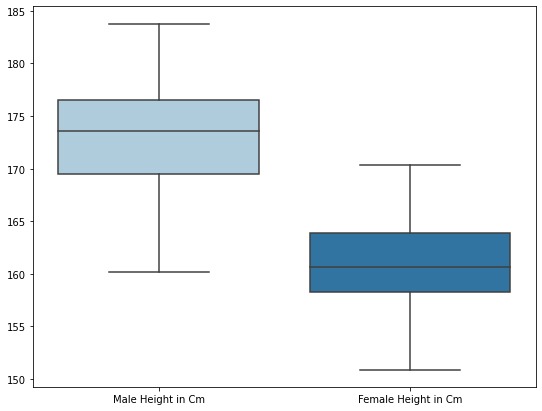

In [66]:
plt.figure(figsize=(9,7))
sns.boxplot(data = df.loc[:,['Male Height in Cm', 'Female Height in Cm']], palette = 'Paired')

In [18]:
#Average height of men in cm
avg_height_men=df["Male Height in Cm"].mean()
avg_height_men

173.08904522613054

In [19]:
#Average height of female in cm
avg_height_female=df["Female Height in Cm"].mean()
avg_height_female

160.9429145728643

In [20]:
#Find tallest male per country
max_value_male=df["Male Height in Cm"].idxmax()
max_value_country=df["Country Name"][max_value_male]
print(f"The tallest Male or height of male is :{max_value_country} at {df['Male Height in Cm'].max()}")                                 


The tallest Male or height of male is :Netherlands at 183.78


<Figure size 720x504 with 0 Axes>

<AxesSubplot:xlabel='Country Name', ylabel='Male Height in Cm'>

(175.0, 185.0)

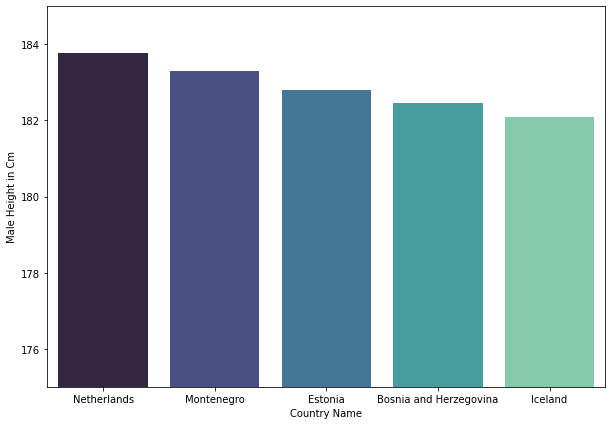

In [70]:
# Visulaiization for male_height
plt.figure(figsize=(10,7))

top_height = df.sort_values('Male Height in Cm',ascending=False).head()
sns.barplot(x='Country Name',y = df['Male Height in Cm'],data = top_height,palette="mako")
plt.ylim(ymax=185,ymin=175)

In [22]:
#Find tallest Fale per country
max_value_female=df["Female Height in Cm"].idxmax()
max_value_country=df["Country Name"][max_value_male]
print(f"The tallest Male or height of Female is :{max_value_country} at {df['Female Height in Cm'].max()}")

The tallest Male or height of Female is :Netherlands at 170.36


<Figure size 720x504 with 0 Axes>

<AxesSubplot:xlabel='Country Name', ylabel='Female Height in Cm'>

(150.0, 180.0)

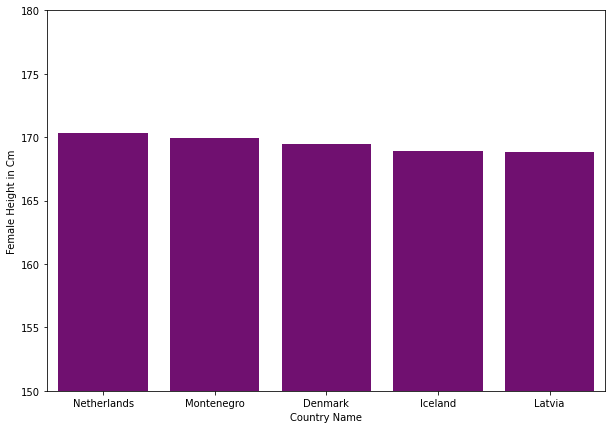

In [71]:
# Visulaiization for female_height
plt.figure(figsize=(10,7))
top_height_female = df.sort_values('Female Height in Cm',ascending=False).head()
sns.barplot(x='Country Name',y = df['Female Height in Cm'],data = top_height_female,color = 'purple')
plt.ylim(ymax=180,ymin=150)

In [24]:
# find smallest male per country
min_value_male = df['Male Height in Cm'].idxmin()
min_value_country =df['Country Name'][min_value_male]
print(f"The smallest male or height  is :{min_value_country} at {df['Male Height in Cm'].min()}")

The smallest male or height  is :Timor-Leste at 160.13


In [25]:
# short Female
min_value_female = df['Female Height in Cm'].idxmin()
min_value_country =df['Country Name'][min_value_female]
print(f"The smallest female or height  is :{min_value_country} at {df['Female Height in Cm'].min()}")

The smallest female or height  is :Guatemala at 150.91


<Figure size 720x504 with 0 Axes>

<AxesSubplot:xlabel='Country Name', ylabel='Male Height in Cm'>

(150.0, 175.0)

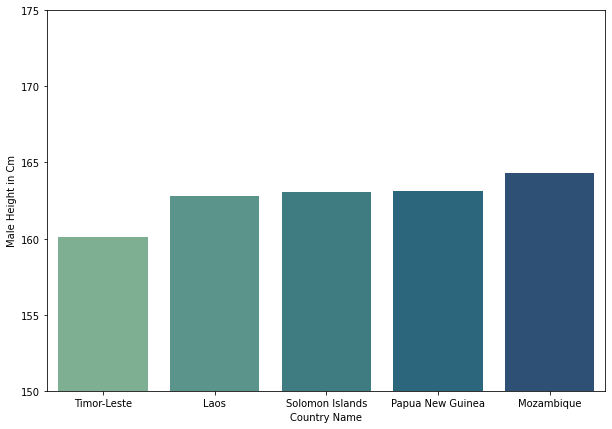

In [73]:
# Visulaiization for shortest_male_height
plt.figure(figsize=(10,7))

shortest_height = df.sort_values('Male Height in Cm',ascending=True).head()
sns.barplot(x='Country Name',y = df['Male Height in Cm'],data = shortest_height,palette="crest")
plt.ylim(ymax=175,ymin=150)

<Figure size 720x504 with 0 Axes>

<AxesSubplot:xlabel='Country Name', ylabel='Female Height in Cm'>

(150.0, 170.0)

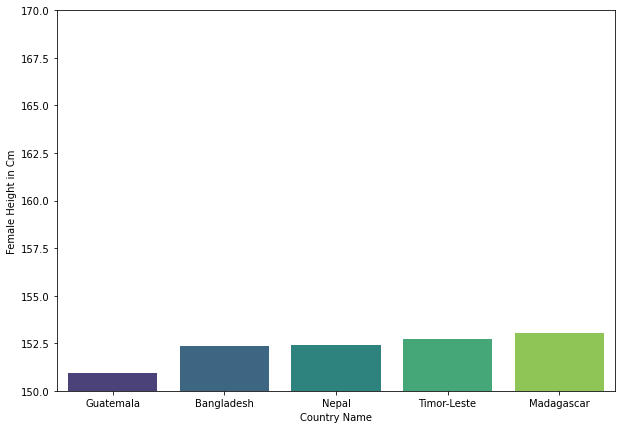

In [74]:
# Visulaiization for female_height
plt.figure(figsize=(10,7))
shortest_height_female = df.sort_values('Female Height in Cm',ascending=True).head()
sns.barplot(x='Country Name',y = df['Female Height in Cm'],data = shortest_height_female,palette ="viridis")
plt.ylim(ymax=170,ymin=150)

<AxesSubplot:ylabel='Male Height in Cm'>

Text(0, 0.5, 'Male Height in Cm ($)')

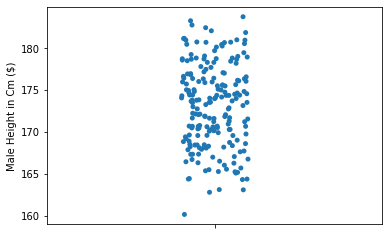

In [28]:
#Strip plot

sns.stripplot(y="Male Height in Cm", data=df,jitter=True)
plt.ylabel("Male Height in Cm ($)")
plt.show()

<AxesSubplot:xlabel='Male Height in Cm', ylabel='Country Name'>

Text(0, 0.5, 'Male Height in Cm ($)')

<Figure size 2520x2088 with 0 Axes>

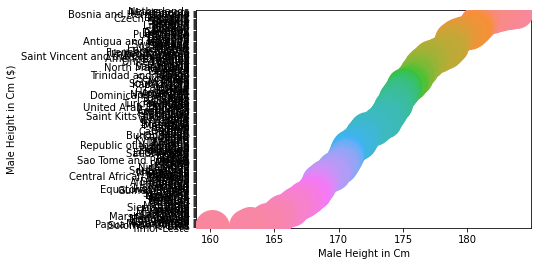

<Figure size 2520x2088 with 0 Axes>

In [76]:
#Grouping with Stripplot()

sns.stripplot(y='Country Name',x='Male Height in Cm', data=df,size=35, jitter= False)
plt.ylabel("Male Height in Cm ($)")
plt.figure(figsize=(35,29))
plt.show()

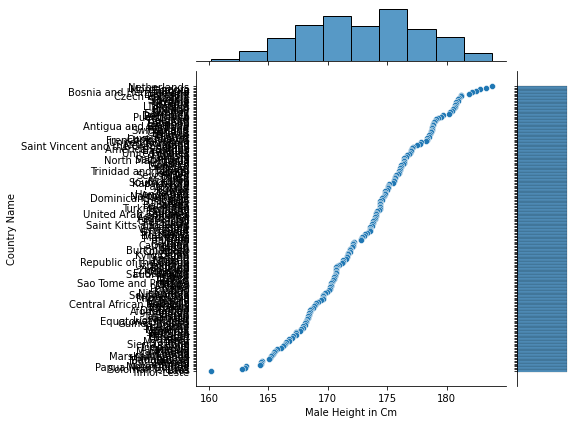

In [30]:
#Density plot
sns.jointplot(y="Country Name",x="Male Height in Cm", data=df)
plt.show()

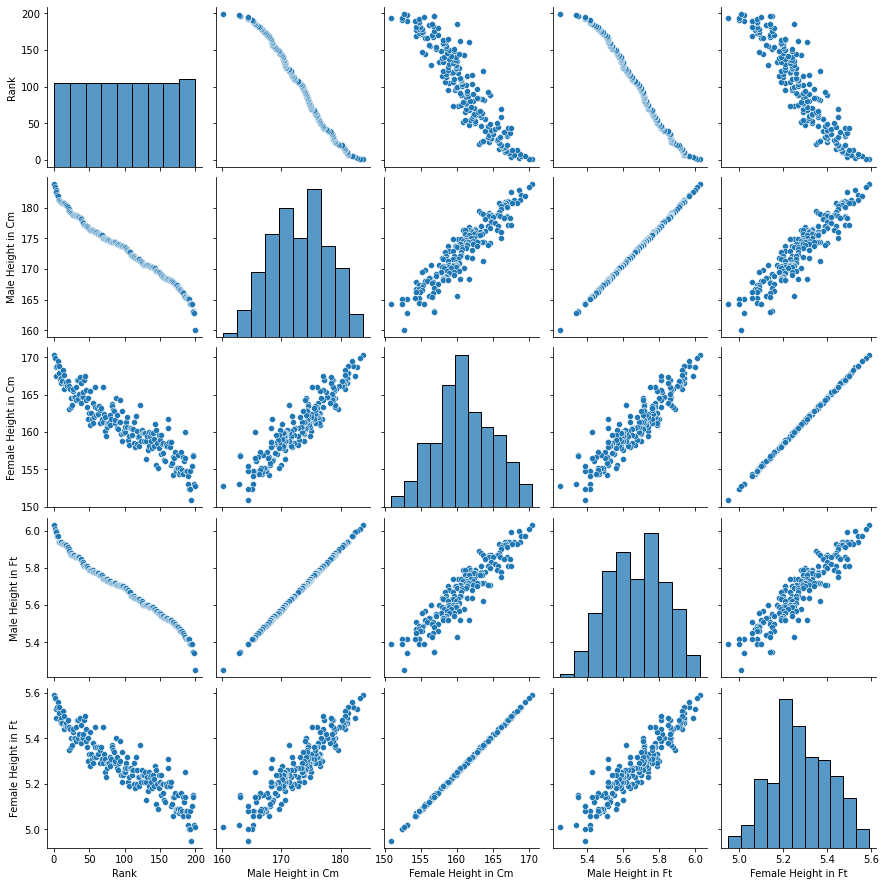

In [31]:
#Pair plot
sns.pairplot(df)
plt.show()